<a href="https://colab.research.google.com/github/MohammadRehaanAli/The-Real-Estate-Market-Analysis/blob/main/The_Real_Estate_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Real Estate Market Analysis**

---
 This project involves analyzing housing market data for three major cities in India—Bangalore, Chennai, and Hyderabad. The analysis focuses on exploring the distribution of property prices, identifying trends based on key features like area, number of bedrooms, and location. The project includes data cleaning, visualization of price distributions, and correlation analysis between different property attributes. Insights from this analysis help understand how property prices vary across different cities, providing valuable information for potential homebuyers, real estate investors, and urban planners.

### **step 1 : Loading the dataset into the dataframe**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
# Loading each CSV into a DataFrame
bangalore_data = pd.read_csv('Bangalore.csv')
chennai_data = pd.read_csv('Chennai.csv')
hyderabad_data = pd.read_csv('Hyderabad.csv')

### step 1a : displaying the first few rows of the dataset to verify the data

In [ ]:
print(bangalore_data.head())
print(chennai_data.head())
print(hyderabad_data.head())

      Price  Area                         Location  No. of Bedrooms  Resale  \
0  30000000  3340                 JP Nagar Phase 1                4       0   
1   7888000  1045       Dasarahalli on Tumkur Road                2       0   
2   4866000  1179  Kannur on Thanisandra Main Road                2       0   
3   8358000  1675                     Doddanekundi                3       0   
4   6845000  1670                          Kengeri                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 1          1             1                  1             1   
1                 0          1             1                  1             1   
2                 0          1             1                  1             1   
3                 0          0             0                  0             0   
4                 1          1             1                  1             1   

   ...  LiftAvailable  BED  VaastuComp

### Step 2 : Data cleaning and Preprocessing

### step 2a : inspecting the data for any missing values

In [ ]:
# Checking for missing values in each dataset
print(bangalore_data.isnull().sum())
print(chennai_data.isnull().sum())
print(hyderabad_data.isnull().sum())

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


### Step 2b : Checking the Data type to ensure coloumns like price, area, and also columns like location are categorical

In [ ]:
# Check the data types of each column
print(bangalore_data.dtypes)
print(chennai_data.dtypes)
print(hyderabad_data.dtypes)

Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

### Step 2c : Removing Duplicates rows in the data

In [ ]:
# Remove duplicate rows
bangalore_data = bangalore_data.drop_duplicates()
chennai_data = chennai_data.drop_duplicates()
hyderabad_data = hyderabad_data.drop_duplicates()



*   Ok,Now we have removed duplicates rows
in the data by using function called drop_duplicates() and if we want to check whether there are any duplicates , u can just print the count of duplicates


*   Or if u want to check the how many duplicates were there in the data u can just print the sum of duplicates by using this function duplicated().sum()) and it has to be done before removing the duplicates from data  






In [ ]:
print("Duplicates in Bangalore:", bangalore_data.duplicated().sum())
print("Duplicates in Chennai:", chennai_data.duplicated().sum())
print("Duplicates in Hyderabad:", hyderabad_data.duplicated().sum())

Duplicates in Bangalore: 0
Duplicates in Chennai: 0
Duplicates in Hyderabad: 0


### Step 2d :  Handling missing values in the data




*   Droping rows with missing values





*   So now before dropping missing values , u can check them by using this function isnull().sum()) and the able to handle the missing values using this function dropna()



In [ ]:
print("Missing values in Bangalore:\n", bangalore_data.isnull().sum())
print("Missing values in Chennai:\n", chennai_data.isnull().sum())
print("Missing values in Hyderabad:\n", hyderabad_data.isnull().sum())

Missing values in Bangalore:
 Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe            



*   So now as u can see there are no missing values in data , or if there any u can handle them using this code



In [ ]:
bangalore_data = bangalore_data.dropna()
chennai_data = chennai_data.dropna()
hyderabad_data = hyderabad_data.dropna()



Step 2e :  Now filling missing values with the mean ( for numeric columns )



In [ ]:
numeric_columns_bangalore = bangalore_data.select_dtypes(include=np.number).columns
bangalore_data[numeric_columns_bangalore] = bangalore_data[numeric_columns_bangalore].fillna(bangalore_data[numeric_columns_bangalore].mean())

numeric_columns_chennai = chennai_data.select_dtypes(include=np.number).columns
chennai_data[numeric_columns_chennai] = chennai_data[numeric_columns_chennai].fillna(chennai_data[numeric_columns_chennai].mean())

numeric_columns_hyderabad = hyderabad_data.select_dtypes(include=np.number).columns
hyderabad_data[numeric_columns_hyderabad] = hyderabad_data[numeric_columns_hyderabad].fillna(hyderabad_data[numeric_columns_hyderabad].mean())

### Step 2f : Rename Columns (Optional)


*   To ensure consistency, rename the columns to lowercase and strip spaces.



In [2]:
# Rename columns to lowercase and strip spaces
bangalore_data.columns = bangalore_data.columns.str.strip().str.lower()
chennai_data.columns = chennai_data.columns.str.strip().str.lower()
hyderabad_data.columns = hyderabad_data.columns.str.strip().str.lower()

### Step 3 : Data Exploration

### Step 3a Getting Summary Statistics

*   Examining basic statistics of the numerical columns to understand their distributions.







In [4]:
# Displaying statistical summary of numerical columns
print(bangalore_data.describe())
print(chennai_data.describe())
print(hyderabad_data.describe())

              price         area  no. of bedrooms       resale  \
count  6.207000e+03  6207.000000      6207.000000  6207.000000   
mean   1.058510e+07  1526.094248         2.556952     0.078782   
std    1.410943e+07   764.845609         0.694300     0.269420   
min    2.000000e+06   415.000000         1.000000     0.000000   
25%    5.000000e+06  1110.000000         2.000000     0.000000   
50%    7.368000e+06  1340.000000         3.000000     0.000000   
75%    1.070000e+07  1662.500000         3.000000     0.000000   
max    3.000000e+08  9900.000000         7.000000     1.000000   

       maintenancestaff    gymnasium  swimmingpool  landscapedgardens  \
count       6207.000000  6207.000000   6207.000000        6207.000000   
mean           6.208797     6.461576      6.436121           6.382471   
std            4.126883     3.752421      3.792567           3.875271   
min            0.000000     0.000000      0.000000           0.000000   
25%            0.000000     1.000000    

### Step 3b : Check for Correlations


*   Now if your data includes numerical features like price, area, and number of bedrooms, check for the correlations.



In [6]:
# Checking correlations between columns (e.g., price, area, etc.)
print(bangalore_data.select_dtypes(include=['number']).corr())
print(chennai_data.select_dtypes(include=['number']).corr())
print(hyderabad_data.select_dtypes(include=['number']).corr())

                        price      area  no. of bedrooms    resale  \
price                1.000000  0.397626         0.234272 -0.038024   
area                 0.397626  1.000000         0.733010  0.021379   
no. of bedrooms      0.234272  0.733010         1.000000 -0.015806   
resale              -0.038024  0.021379        -0.015806  1.000000   
maintenancestaff     0.030497  0.008910         0.024080 -0.034941   
gymnasium            0.031976  0.011436         0.027791 -0.032628   
swimmingpool         0.034450  0.014659         0.031352 -0.034735   
landscapedgardens    0.029744  0.011841         0.028554 -0.032260   
joggingtrack         0.035339  0.016572         0.030822 -0.032120   
rainwaterharvesting  0.033558  0.012948         0.028072 -0.029972   
indoorgames          0.033942  0.013533         0.029305 -0.028865   
shoppingmall         0.029271  0.008135         0.023286 -0.034650   
intercom             0.030951  0.008993         0.025169 -0.029042   
sportsfacility      

### Now here comes the main part is to Visulaize the data
Step 3c : Visulaizing the Data


*   So,now there are two ways for visualizing the data
            1.Histogram for price distributions
            2.Seaborn plot for price vs Area




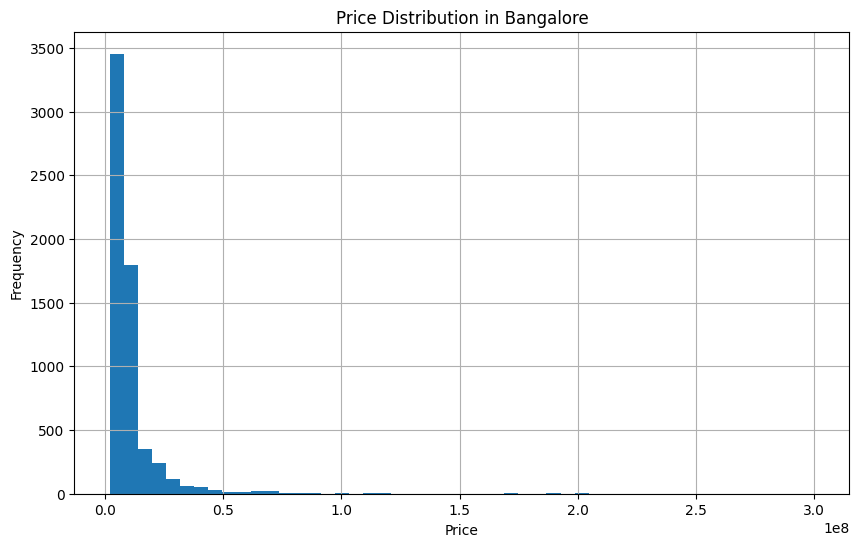

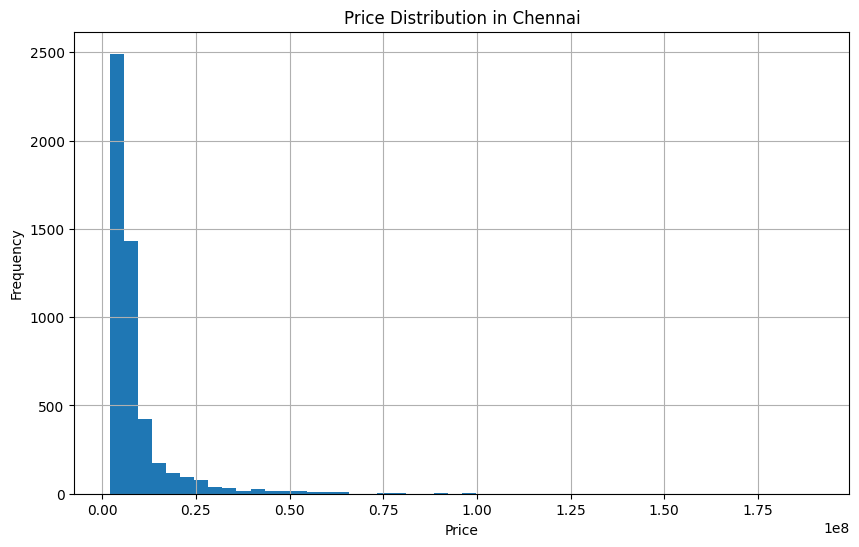

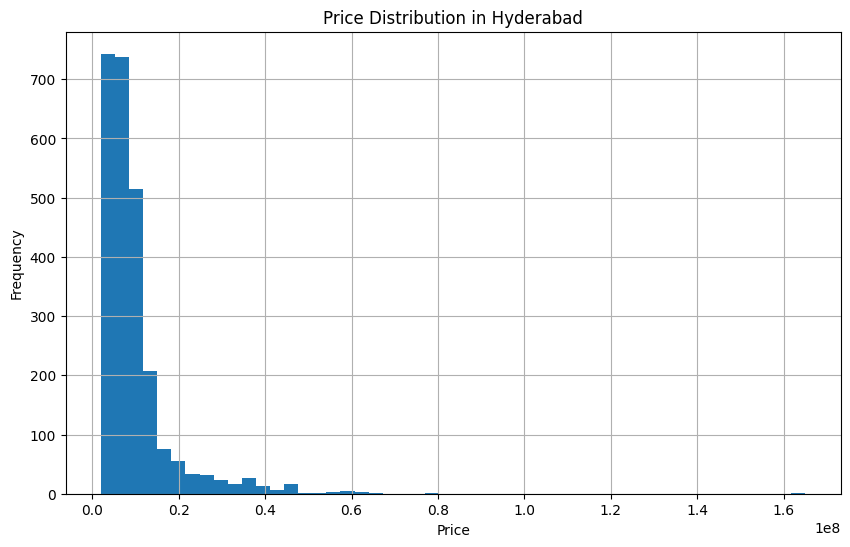

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for price distributions in each city
plt.figure(figsize=(10, 6))
bangalore_data['price'].hist(bins=50)
plt.title("Price Distribution in Bangalore")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
chennai_data['price'].hist(bins=50)
plt.title("Price Distribution in Chennai")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
hyderabad_data['price'].hist(bins=50)
plt.title("Price Distribution in Hyderabad")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

2. Seaborn plot for Price vs Area

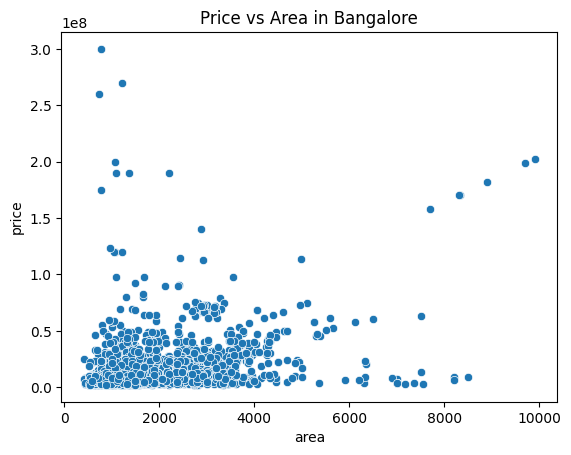

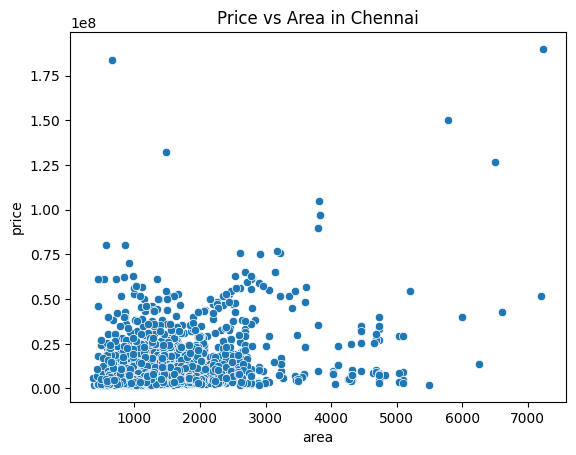

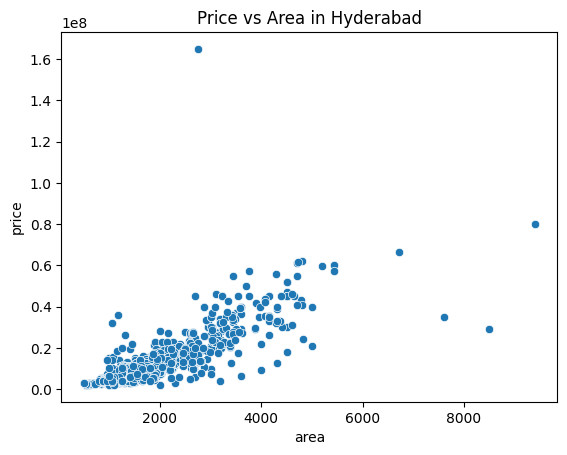

In [8]:
import seaborn as sns

# Scatter plot: Price vs Area (assuming 'area' and 'price' columns exist)
sns.scatterplot(data=bangalore_data, x='area', y='price')
plt.title("Price vs Area in Bangalore")
plt.show()

sns.scatterplot(data=chennai_data, x='area', y='price')
plt.title("Price vs Area in Chennai")
plt.show()

sns.scatterplot(data=hyderabad_data, x='area', y='price')
plt.title("Price vs Area in Hyderabad")
plt.show()

### Now we will be Analyzing the data Using simple linear regression model using sckit-learn

### Step 4 : Data Analysis

Step 4a : Price prediction


*   Now we will predict the house prices,so now we can bulid a simple linear regression model using scikit-learn



In [30]:
# Access the columns using the correct names. Fix based on output of print(bangalore_data.columns)
# One-hot encode the 'Location' column
X = pd.get_dummies(bangalore_data[['Area', 'Location', 'Price']], columns=['Location'], drop_first=True)

feature_columns = [col for col in X.columns if col != 'Price']
X = X[feature_columns]
y = bangalore_data['Price']  # Modified to select 'Price' instead of 'price'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Banglore data Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Banglore data R-squared Score:", r2_score(y_test, y_pred))

X = pd.get_dummies(chennai_data[['Area', 'Location', 'Price']], columns=['Location'], drop_first=True)

feature_columns = [col for col in X.columns if col != 'Price']
X = X[feature_columns]
y = chennai_data['Price']  # Modified to select 'Price' instead of 'price'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Chennai data Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Chennai data R-squared Score:", r2_score(y_test, y_pred))

X = pd.get_dummies(hyderabad_data[['Area', 'Location', 'Price']], columns=['Location'], drop_first=True)

feature_columns = [col for col in X.columns if col != 'Price']
X = X[feature_columns]
y = hyderabad_data['Price']  # Modified to select 'Price' instead of 'price'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Hyderabad data Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Hyderabad data R-squared Score:", r2_score(y_test, y_pred))

Banglore data Mean Absolute Error: 5033947.532755194
Banglore data R-squared Score: 0.16011730887119557
Chennai data Mean Absolute Error: 4256832.672297215
Chennai data R-squared Score: 0.1906264094687513
Hyderabad data Mean Absolute Error: 6114811889859.011
Hyderabad data R-squared Score: -346043391794334.3


### Step 4b : Comparing Price Trends Across Cities

*   Plot comparative visualizations to show price trends between Bangalore, Chennai, and Hyderabad.



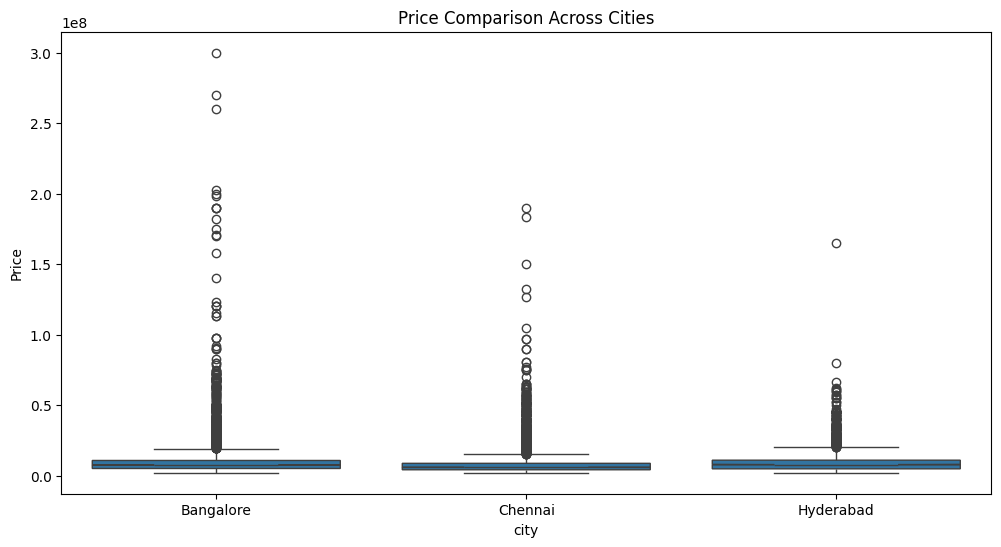

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new DataFrame with data from all three cities
bangalore_data['city'] = 'Bangalore'
chennai_data['city'] = 'Chennai'
hyderabad_data['city'] = 'Hyderabad'

# Combine the data into one DataFrame
combined_data = pd.concat([bangalore_data[['Price', 'city']],
                           chennai_data[['Price', 'city']],
                           hyderabad_data[['Price', 'city']]])

# Plot comparative boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='Price', data=combined_data, notch=True)
plt.title("Price Comparison Across Cities")
plt.ylabel("Price")
plt.show()

### Explantion


*   Creating a 'city' column: This helps label each entry in the combined DataFrame by city.
*   Combining data: The pd.concat() function is used to merge the DataFrames.
*  Boxplot: The sns.boxplot() function takes x='city' and y='price' to group prices by city for comparison.





## Now , We have completed the project now lets see key findings and final inshights of this project

# **Key Findings:**

**1. Median Housing Prices:**

* Bangalore showed the highest median housing prices among the three cities, indicating that it remains a premium real estate market with higher property values.
*Chennai had moderately high median prices, suggesting a stable yet less expensive market compared to Bangalore.
*  Hyderabad presented lower median prices, making it relatively more affordable.

**2. Price Variability:**

* Hyderabad demonstrated significant variability in property prices, indicating a diverse market with a range of affordable and premium properties. This variability suggests potential opportunities for both budget-conscious buyers and high-end investors.
* Bangalore showed moderate variability, reflective of its established market with consistent demand and higher property values.
* Chennai exhibited the least variability, pointing to a more stable and less fluctuating market.

**3. Outliers and High-Value Properties:**

* Bangalore had the most high-value outliers, indicative of luxury real estate developments and demand for premium properties.
* Hyderabad also had notable outliers, highlighting emerging high-value properties, possibly driven by rapid urban development and growth in the tech sector.
* Chennai had fewer outliers, aligning with its overall trend of stability.
Comparative Trends:

**4. Price Trends:**

* The comparative boxplots highlighted the difference in price ranges and showed that Bangalore is leading as the most expensive market, with Hyderabad following as an emerging market with considerable potential.

**5. Insights and Recommendations:**

* **Investment Potential**: Bangalore remains a lucrative option for high-value real estate investments due to its established market and strong demand. Hyderabad, with its significant variability and ongoing development, may offer strategic opportunities for investors seeking growth potential at lower initial prices.
* **Stability**: Chennai's stable market may attract those looking for investments with steady returns and minimal risk.
* **Future Considerations**: Continuous urban expansion and economic development in Hyderabad could potentially elevate its median prices in the coming years, making early investments valuable.


# **Conclusion**

This analysis of the real estate markets in Bangalore, Chennai, and Hyderabad reveals distinct trends across the cities. **Bangalore** leads with the highest median housing prices, positioning it as a prime market for high-value investments. **Hyderabad**, with its significant price variability, offers potential for both affordable and luxury real estate opportunities due to ongoing urban growth. **Chennai** stands out for its stability and lower price fluctuations, making it attractive for investors seeking steady returns. The insights provide valuable guidance for stakeholders looking to make informed decisions based on each city's unique market characteristics.